# Import

In [1]:
import lab
import lab.plot
import lab.data
import lab.mmath as mmath
import lab.utils as utils
import lab.arr as arr
import lab.linfit as lf
import lab.constants as const
import lab.utils as utils
from lab.unit import unit as u
from uncertainties import ufloat
import matplotlib.pyplot as plt
import numpy as np
print("Import done!")

Import done!


# Read data

In [2]:
v_0 = 2251.71467 * u("Hz")
D = 45 * u("mm")
a = D / 2
h = 1.5 * u("mm")

In [3]:
low = lab.data.Data("../data/low.csv")
low.head(5)
utils.totex(low, file="../tex/low.tex", columns = {
    "f": "\\nu",
    "U": "V",
    "I": "I"
})

In [4]:
high = lab.data.Data("../data/high.csv")
high.head(5)
utils.totex(high, file="../tex/high.tex", columns = {
    "f": "\\nu",
    "U": "V",
    "I": "I",
    "phi": "\\varphi",
    "T": "T"
})

In [5]:
l_data = lab.data.Data("../data/l.csv")
l_data.head(5)
utils.totex(l_data, file="../tex/ldata.tex", columns = {
    "f": "\\nu",
    "L": "L"
})

In [6]:
low["xi"] = low["U"] / low["f"] / low["I"]
high["xi"] = high["U"] / high["f"] / high["I"]
high["psi"] = high["phi"] / high["T"] * 2 * const.pi - const.pi / 2

In [7]:
utils.totex(low, file="../tex/low.tex", columns = {
    "f": "\\nu",
    "U": "V",
    "I": "I",
    "xi": "\\xi"
})
utils.totex(high, file="../tex/high.tex", columns = {
    "f": "\\nu",
    "U": "V",
    "I": "I",
    "phi": "\\varphi",
    "T": "T",
    "xi": "\\xi",
    "psi": "\\psi"
})

## task 7

In [8]:
x = np.concatenate([low["f"], high["f"]])
x = x ** 2
x = x[:-15]
y = np.concatenate([low["xi"], high["xi"]])
y = 1 / y ** 2
y = y[:-15]
y = arr.Array(y)
y.ito("(Hz*A/V)**2");

In [9]:
k, b = lf.chi2(x, y)
k, b

(0.17843519425128124+/-9.381295915949925e-05 <Unit('ampere ** 2 / volt ** 2')>,
 5116.156921538552+/-4.224940006280038 <Unit('ampere ** 2 * hertz ** 2 / volt ** 2')>)

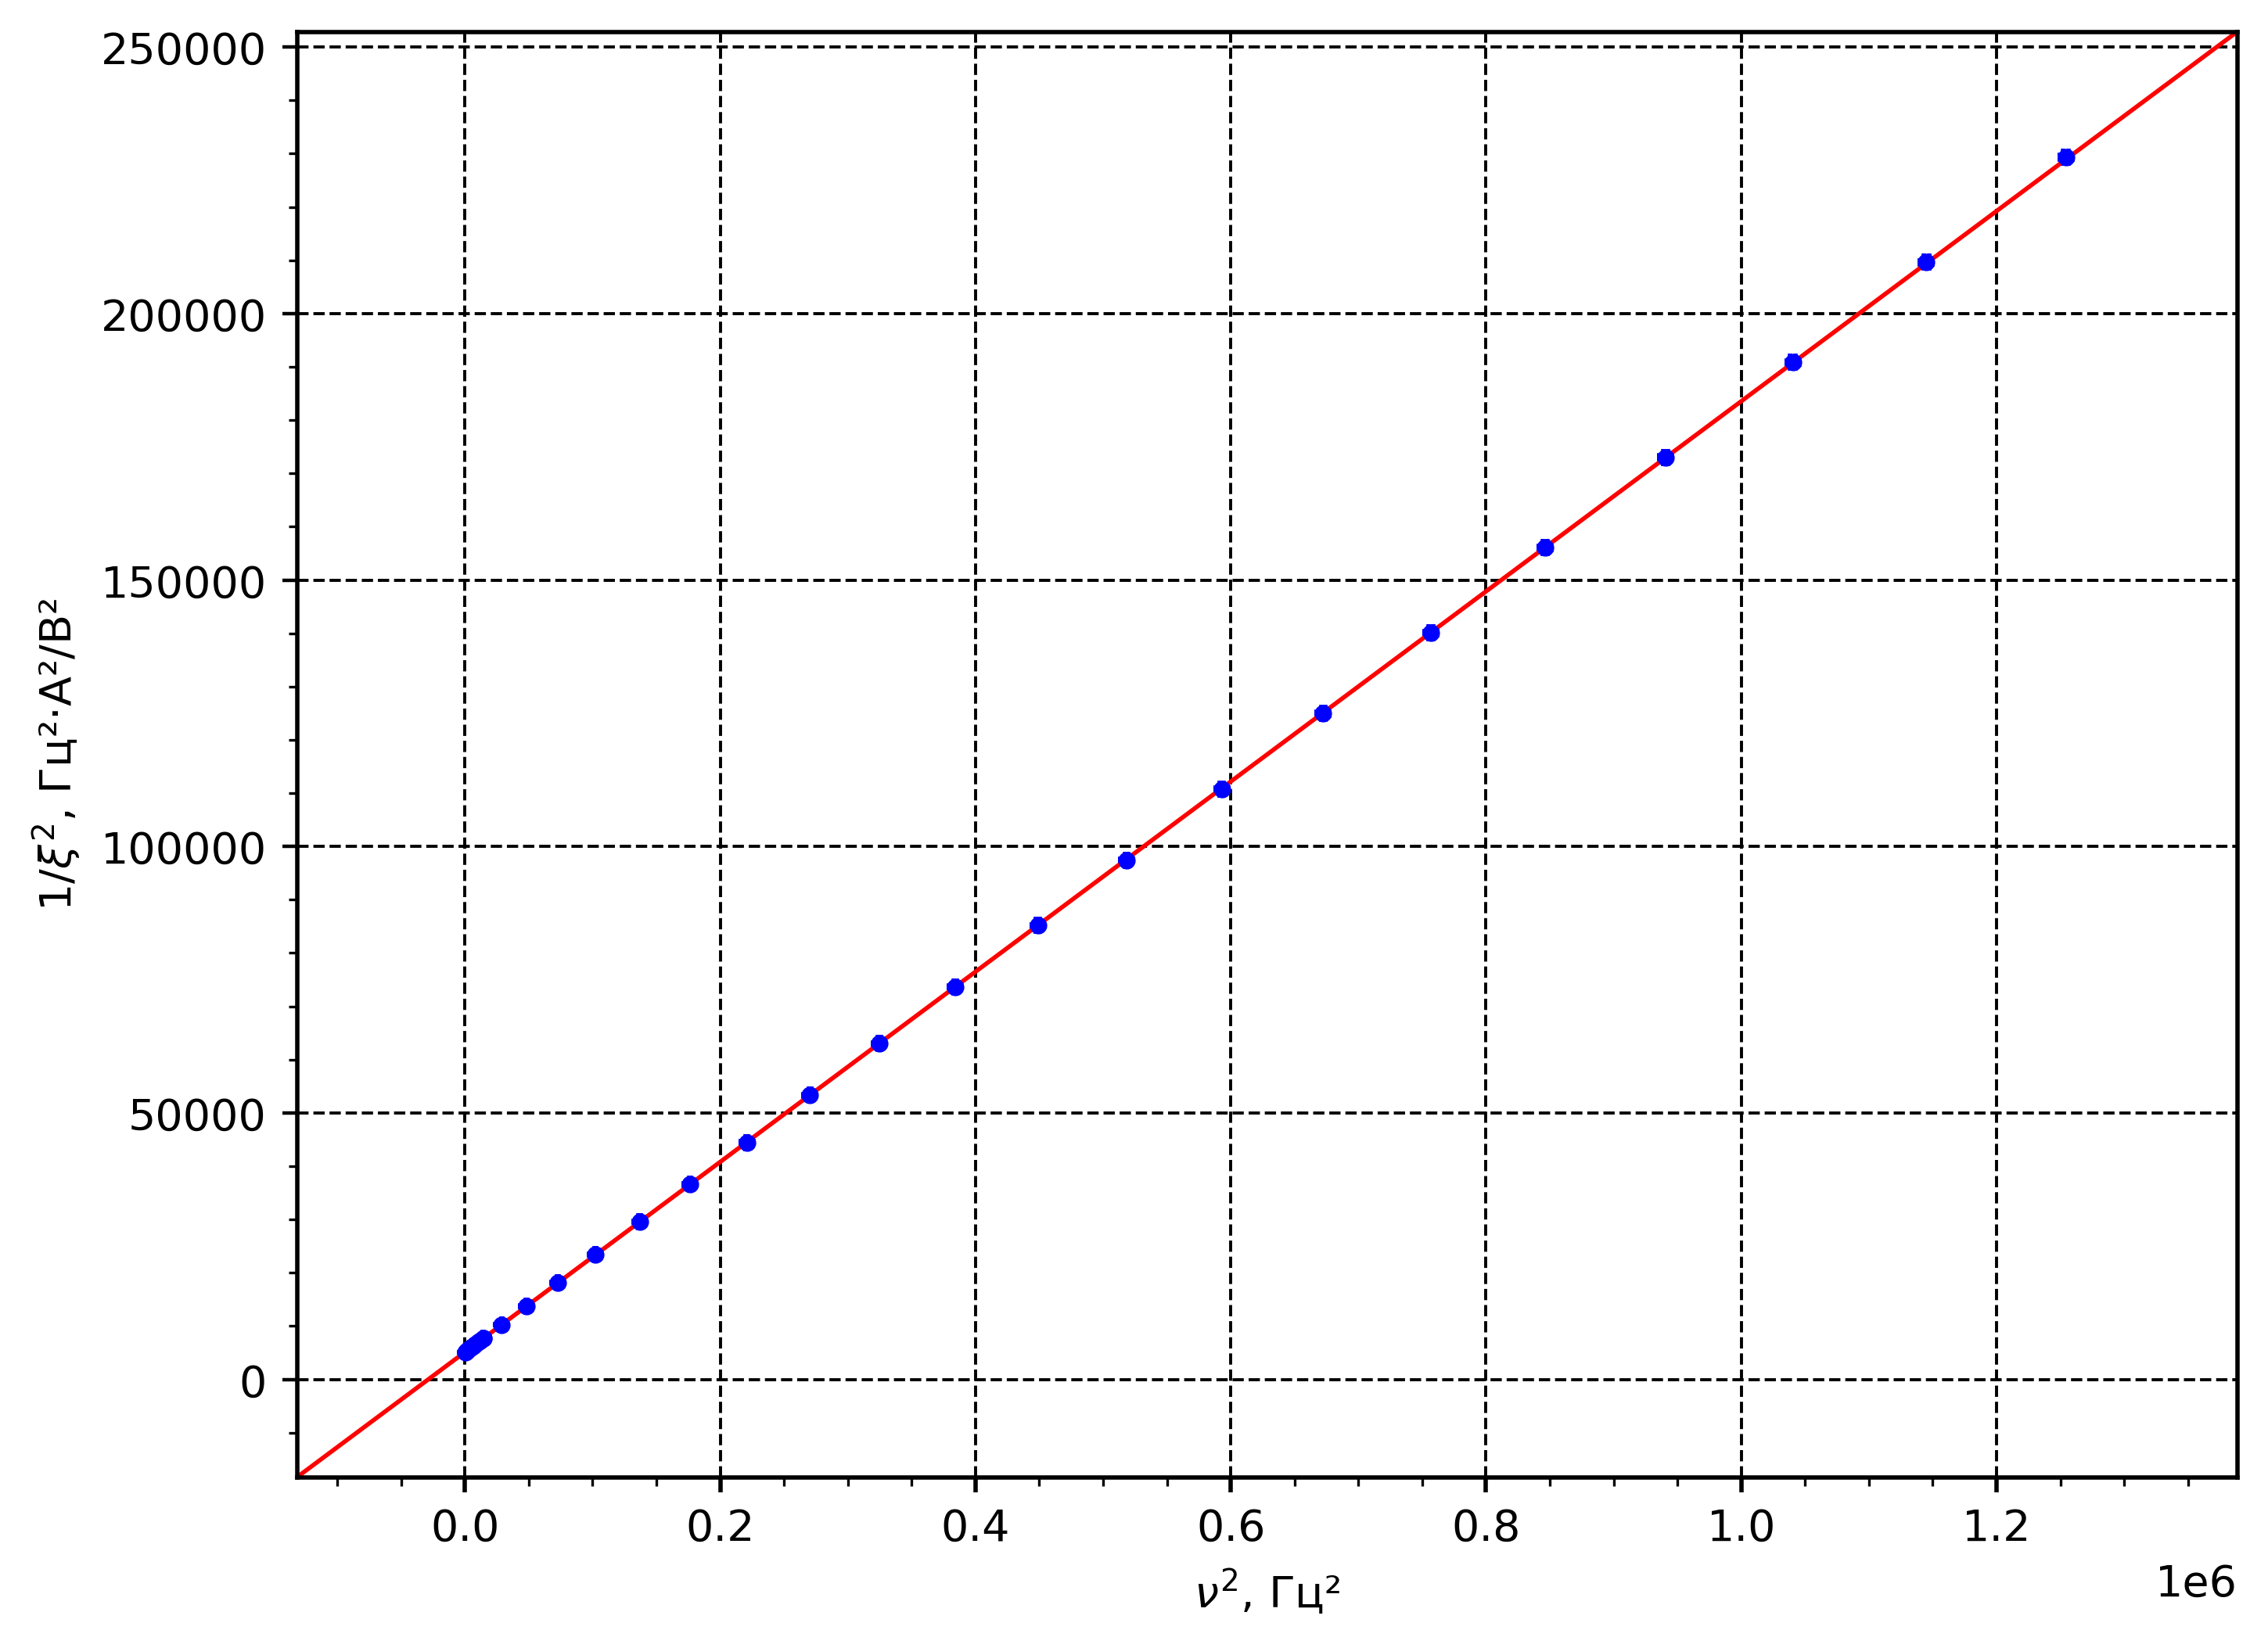

In [10]:
p7 = lab.plot.Plot(yl="$1/\\xi^2$", xl="$\\nu^2$")
p7.plot(x, y, fmt=".")
p7.line(k, b, color="red")
p7.save("../img/plot7.png")

In [13]:
xi_0 = mmath._sqrt(1/b)
utils.totex(xi_0)
low["H1/H2"] = low["xi"] / xi_0
high["H1/H2"] = high["xi"] / xi_0
utils.totex(low, file="../tex/low.tex", columns = {
    "f": "\\nu",
    "U": "V",
    "I": "I",
    "xi": "\\xi",
    "H1/H2": "H_1/H_2"
})
utils.totex(high, file="../tex/high.tex", columns = {
    "f": "\\nu",
    "U": "V",
    "I": "I",
    "phi": "\\varphi",
    "T": "T",
    "xi": "\\xi",
    "psi": "\\psi",
    "H1/H2": "H_1/H_2"
})

\left(13981 \pm 6\right)\cdot 10^{-6}\;\text{В} / \text{Гц}\cdot\text{А}


In [14]:
utils.totex(b)
utils.totex(k)

5116 \pm 4\;\text{Гц}^{2}\cdot\text{А}^{2} / \text{В}^{2}
\left(17844 \pm 9\right)\cdot 10^{-5}\;\text{А}^{2} / \text{В}^{2}


In [15]:
sigma = mmath._sqrt(k / b) / (const.pi * a * h * const.mu0)
sigma.ito(u("siemens/m"))
utils.totex(sigma)

\left(4432 \pm 2\right)\cdot 10^{4}\;\text{См} / \text{м}


## Task8

In [16]:
def concat(*args):
    return np.array(list(args), dtype=object)

In [17]:
y = mmath.tan(arr.Array(high["psi"][:20]))
x = arr.Array(high["f"][:20])

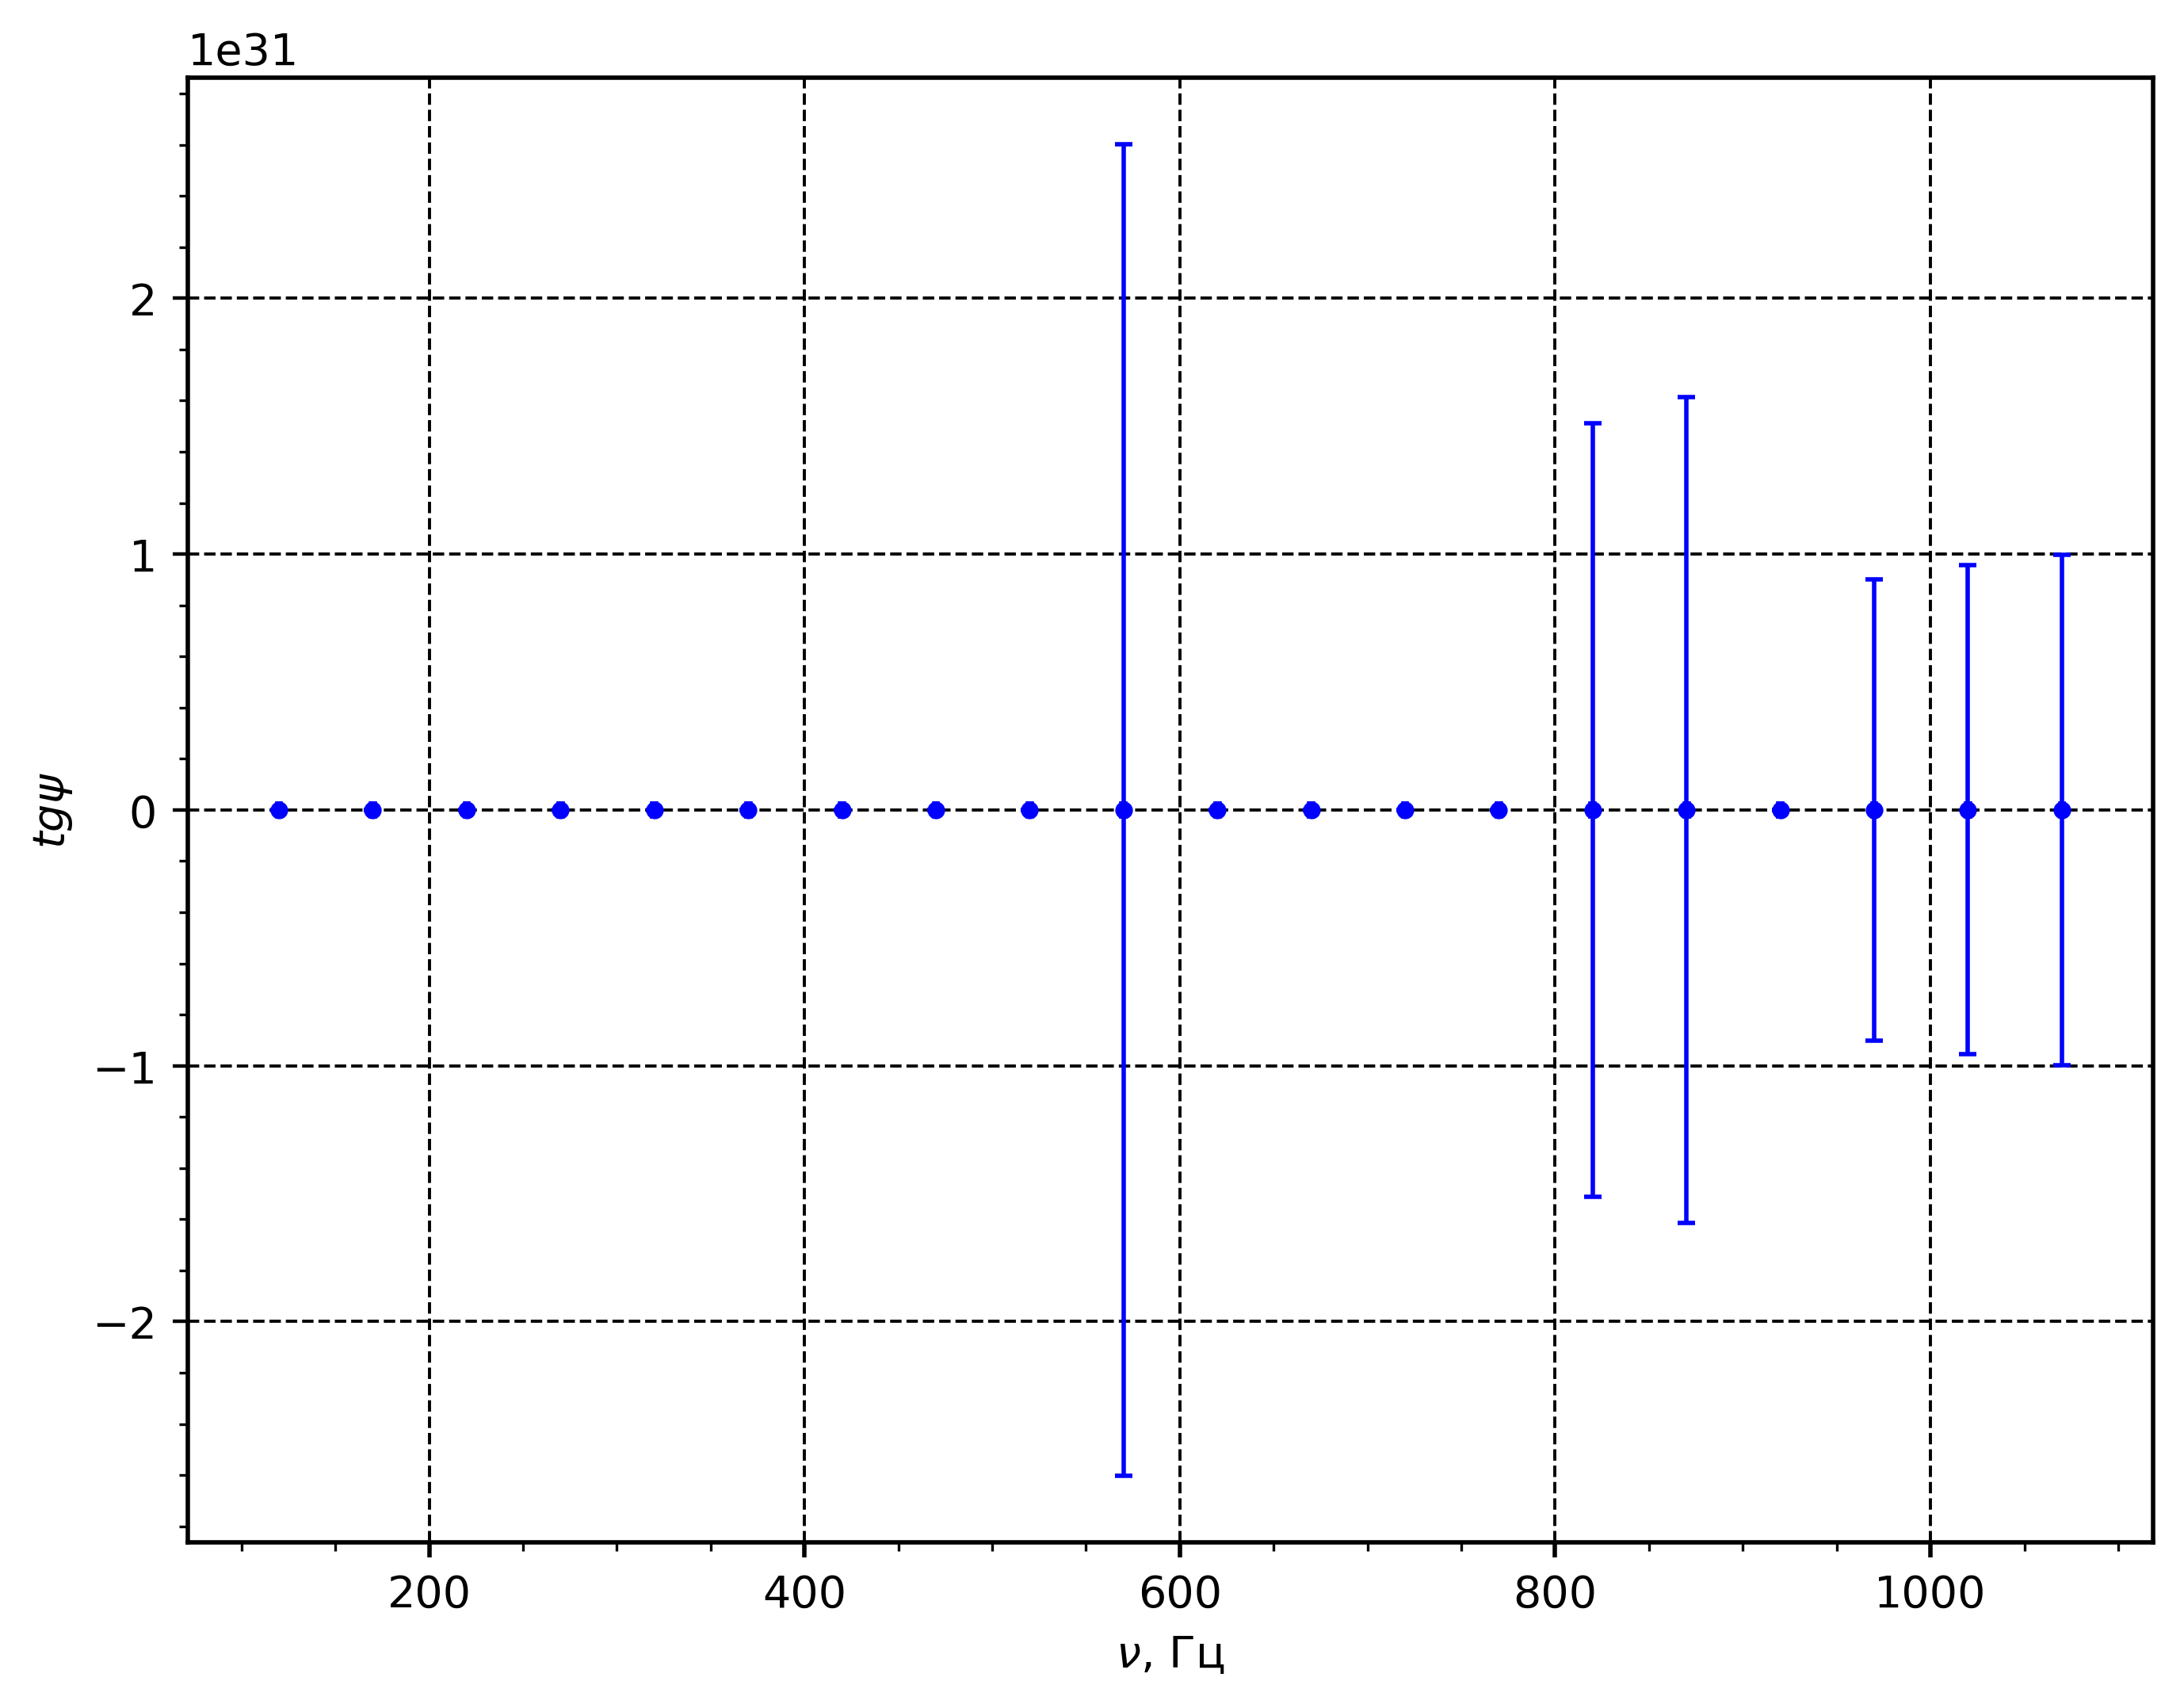

In [18]:
p8 = lab.plot.Plot(xl="$\\nu$", yl="$tg\\psi$")
p8.plot(x, y, fmt=".")
p8.save("../img/plot8_1.png")

In [19]:
x = utils.nominal(x.arr)
y = utils.nominal(y.arr)
x = concat(*x[:8], *x[10:14])
y = concat(*y[:8], *y[10:14])

In [20]:
x_ = concat(*x[:5], *x[6:10], *x[11:])
y_ = concat(*y[:5], *y[6:10], *y[11:])
k, b = lf.lsq(x_, y_)
k, b

(-0.007034153170473613+/-0.0071905715477348945 <Unit('1 / hertz')>,
 1.4038990452405415+/-3.287672113399681 <Unit('dimensionless')>)

In [21]:
utils.totex(k)

\left(-7 \pm 7\right)\cdot 10^{-3}\;\text{Гц}^{-1}


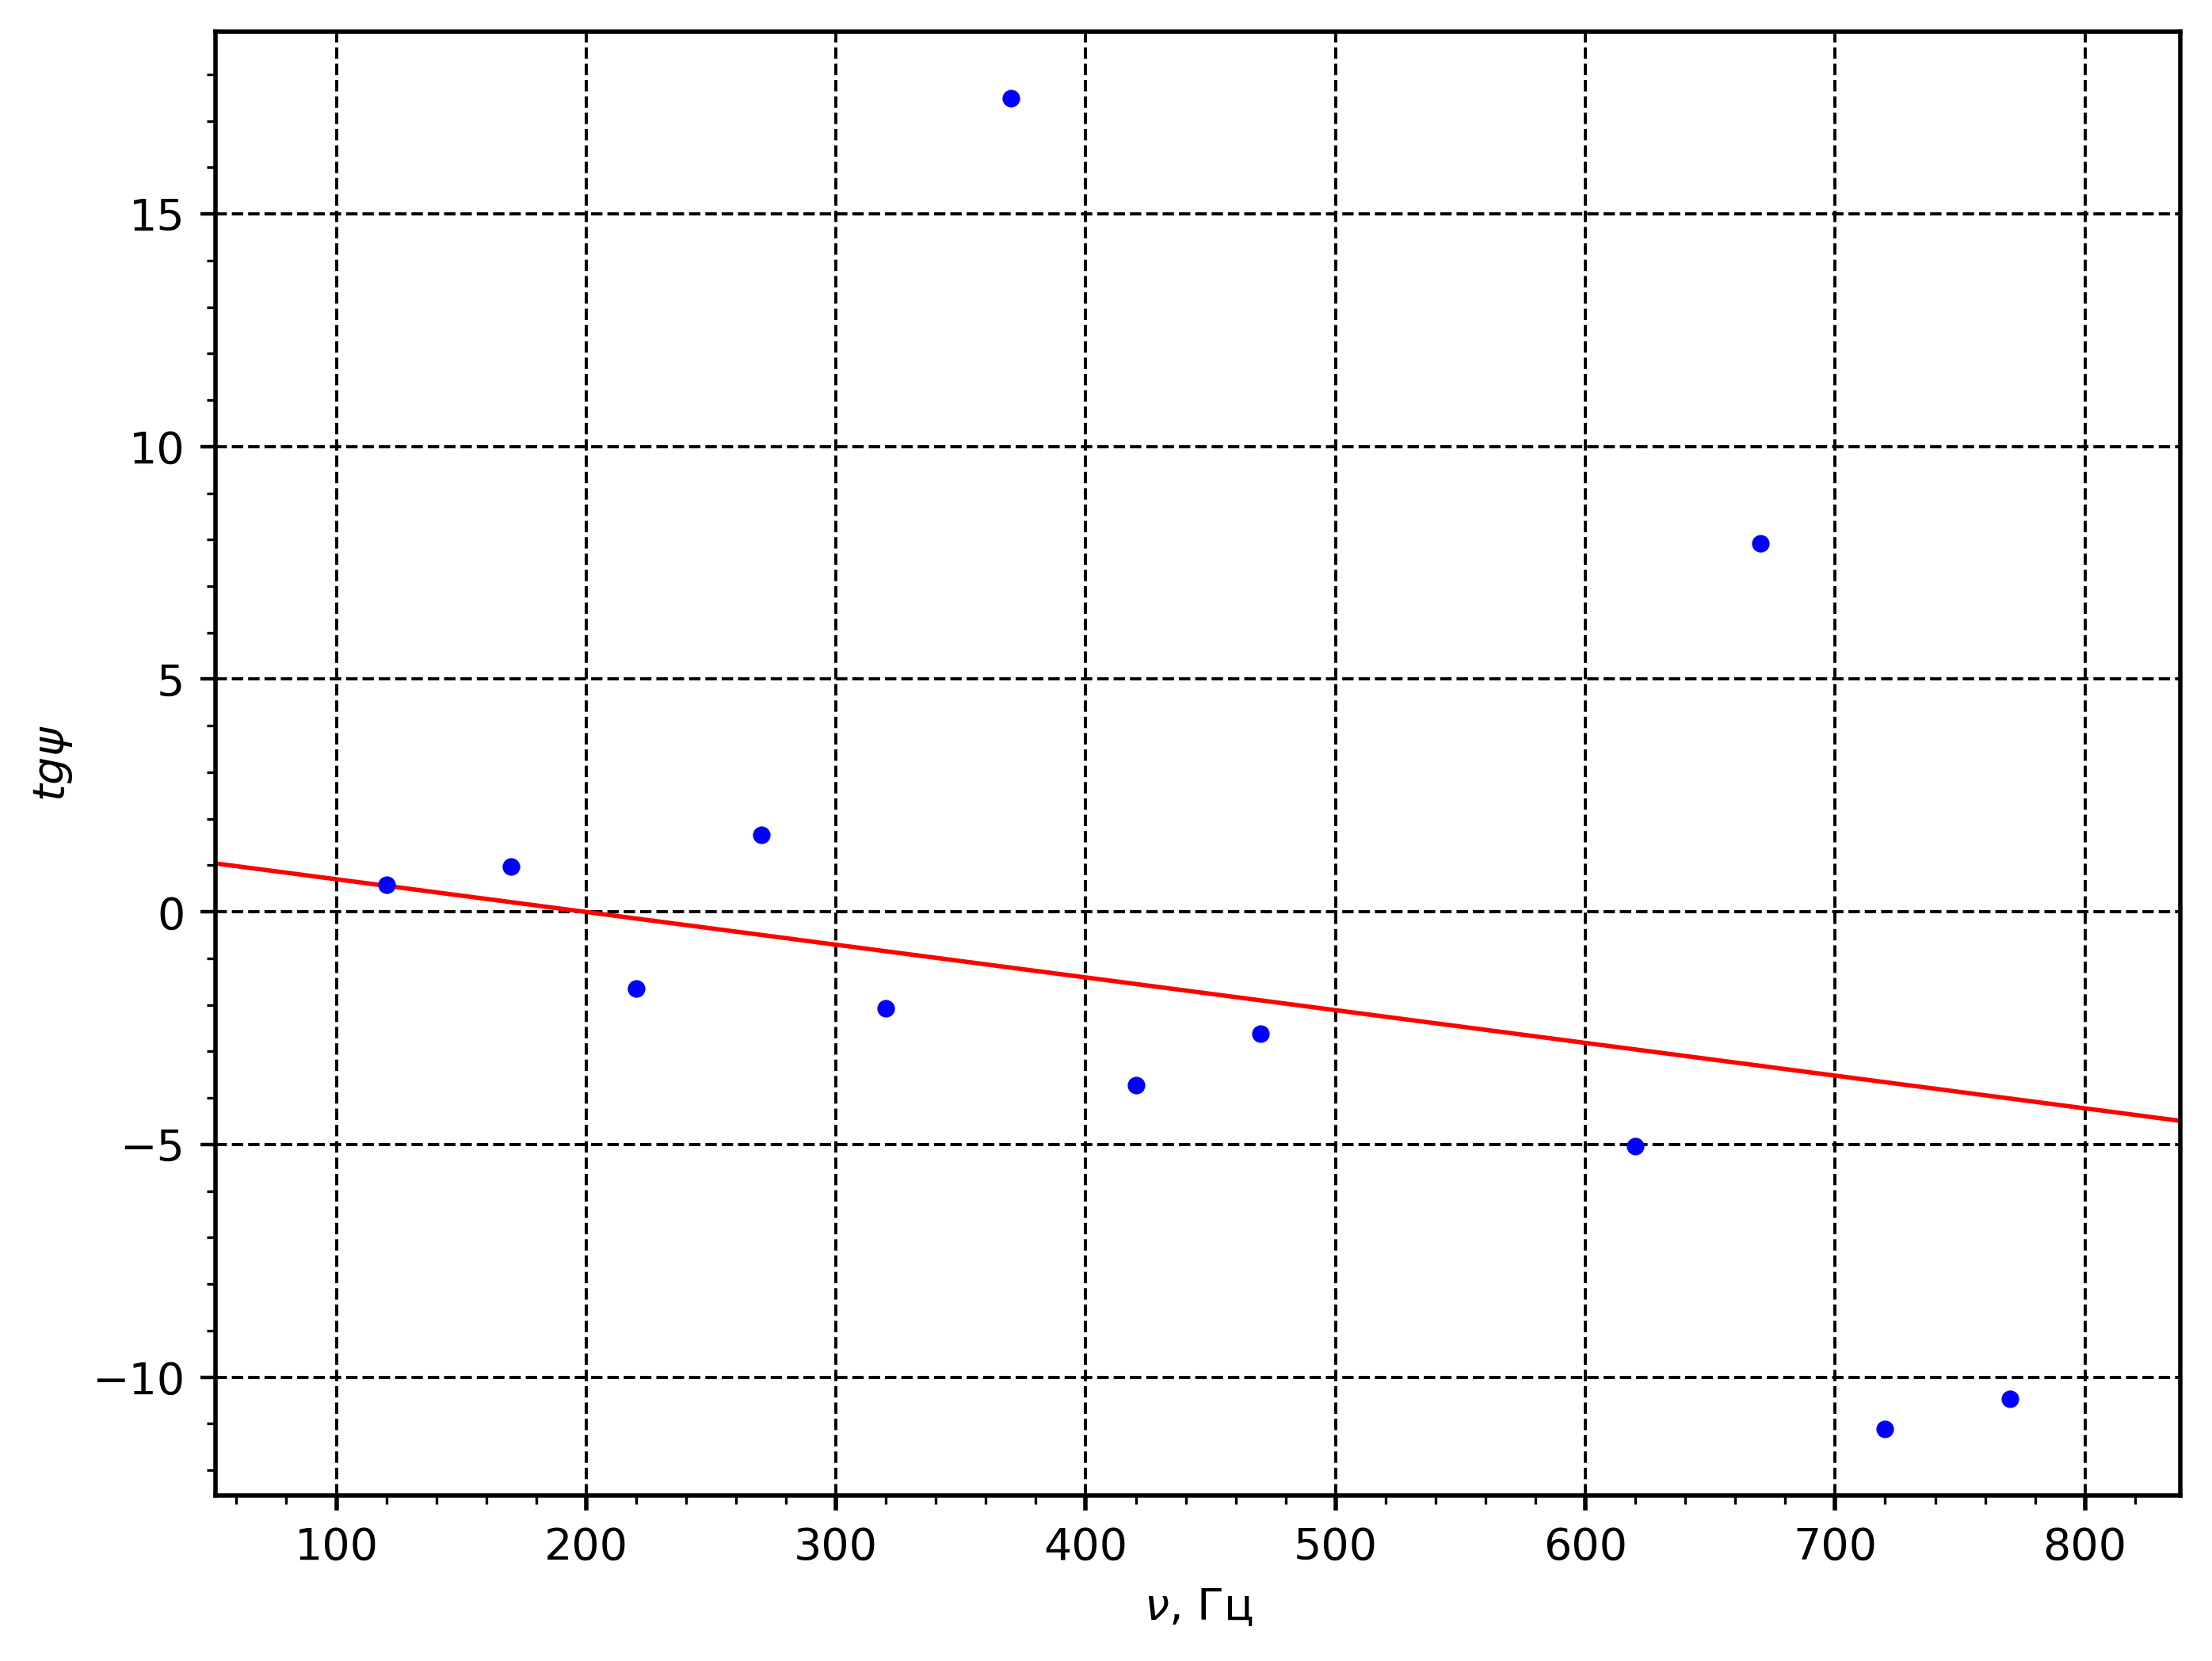

In [22]:
p8_2 = lab.plot.Plot(xl="$\\nu$", yl="$tg\\psi$")
p8_2.plot(x, y, fmt=".")
p8_2.line(k, b, color="red")
p8_2.save("../img/plot8_2.png")

In [23]:
sigma = -2 * k / a / h / const.mu0
sigma.ito("siemens/m")
utils.totex(sigma)

\left(3 \pm 3\right)\cdot 10^{8}\;\text{См} / \text{м}


## Task 9

In [24]:
x = mmath.sqrt(high["f"])
y = high["psi"] - const.pi / 4

In [25]:
k, b = lf.chi2(x[25:], y[25:])
k, b

(0.01933618866502913+/-0.0007103955191658912 <Unit('1 / hertz ** 0.5')>,
 0.12426575622799163+/-0.08044303802847905 <Unit('dimensionless')>)

In [26]:
utils.totex(k)

\left(193 \pm 7\right)\cdot 10^{-4}\;\text{Гц}^{-0.5}


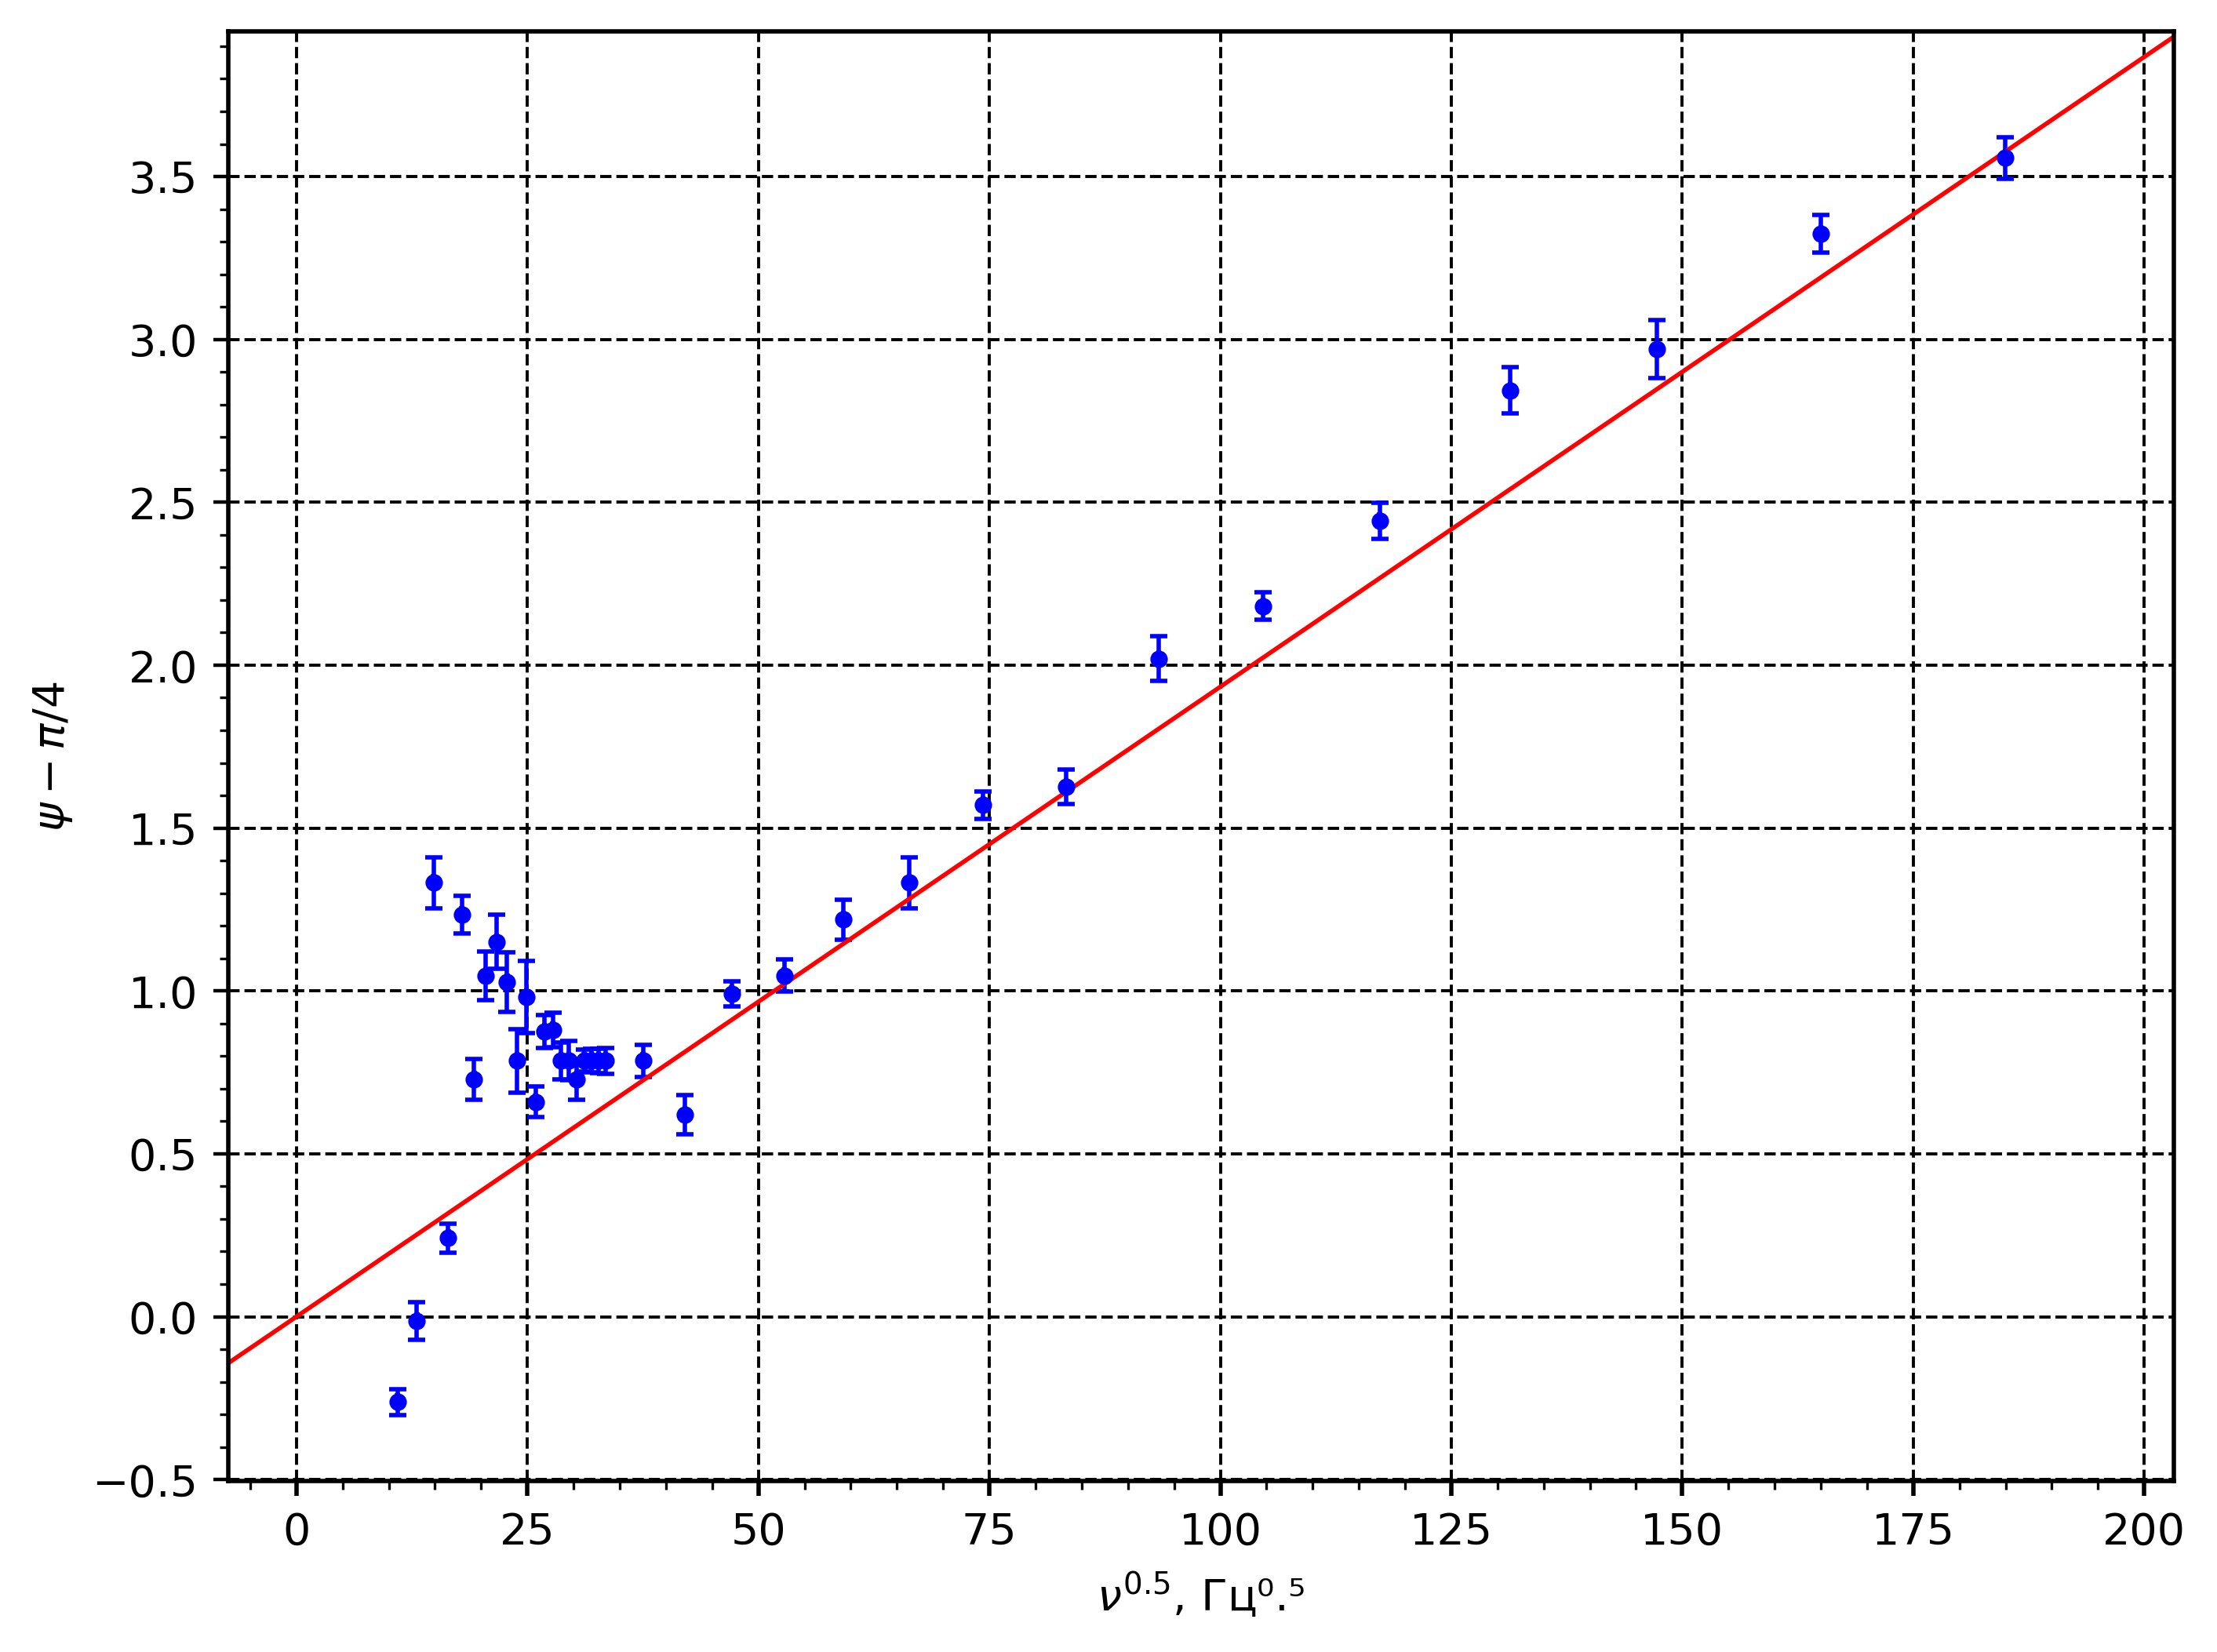

In [27]:
p9 = lab.plot.Plot(xl="$\\nu^{0.5}$", yl="$\\psi - \\pi / 4$")
p9.plot(x, y, fmt=".")
p9.line(k, ufloat(0, 0) * u("dimensionless"), color="red")
p9.save("../img/plot9.png")

In [28]:
sigma = k ** 2 / h ** 2 / const.mu0 / const.pi
sigma.ito("siemens/m")
utils.totex(sigma)

\left(42 \pm 3\right)\cdot 10^{6}\;\text{См} / \text{м}


## Task 10

In [29]:
x = arr.Array(l_data["f"][:11])
y = arr.Array(l_data["L"][:11])

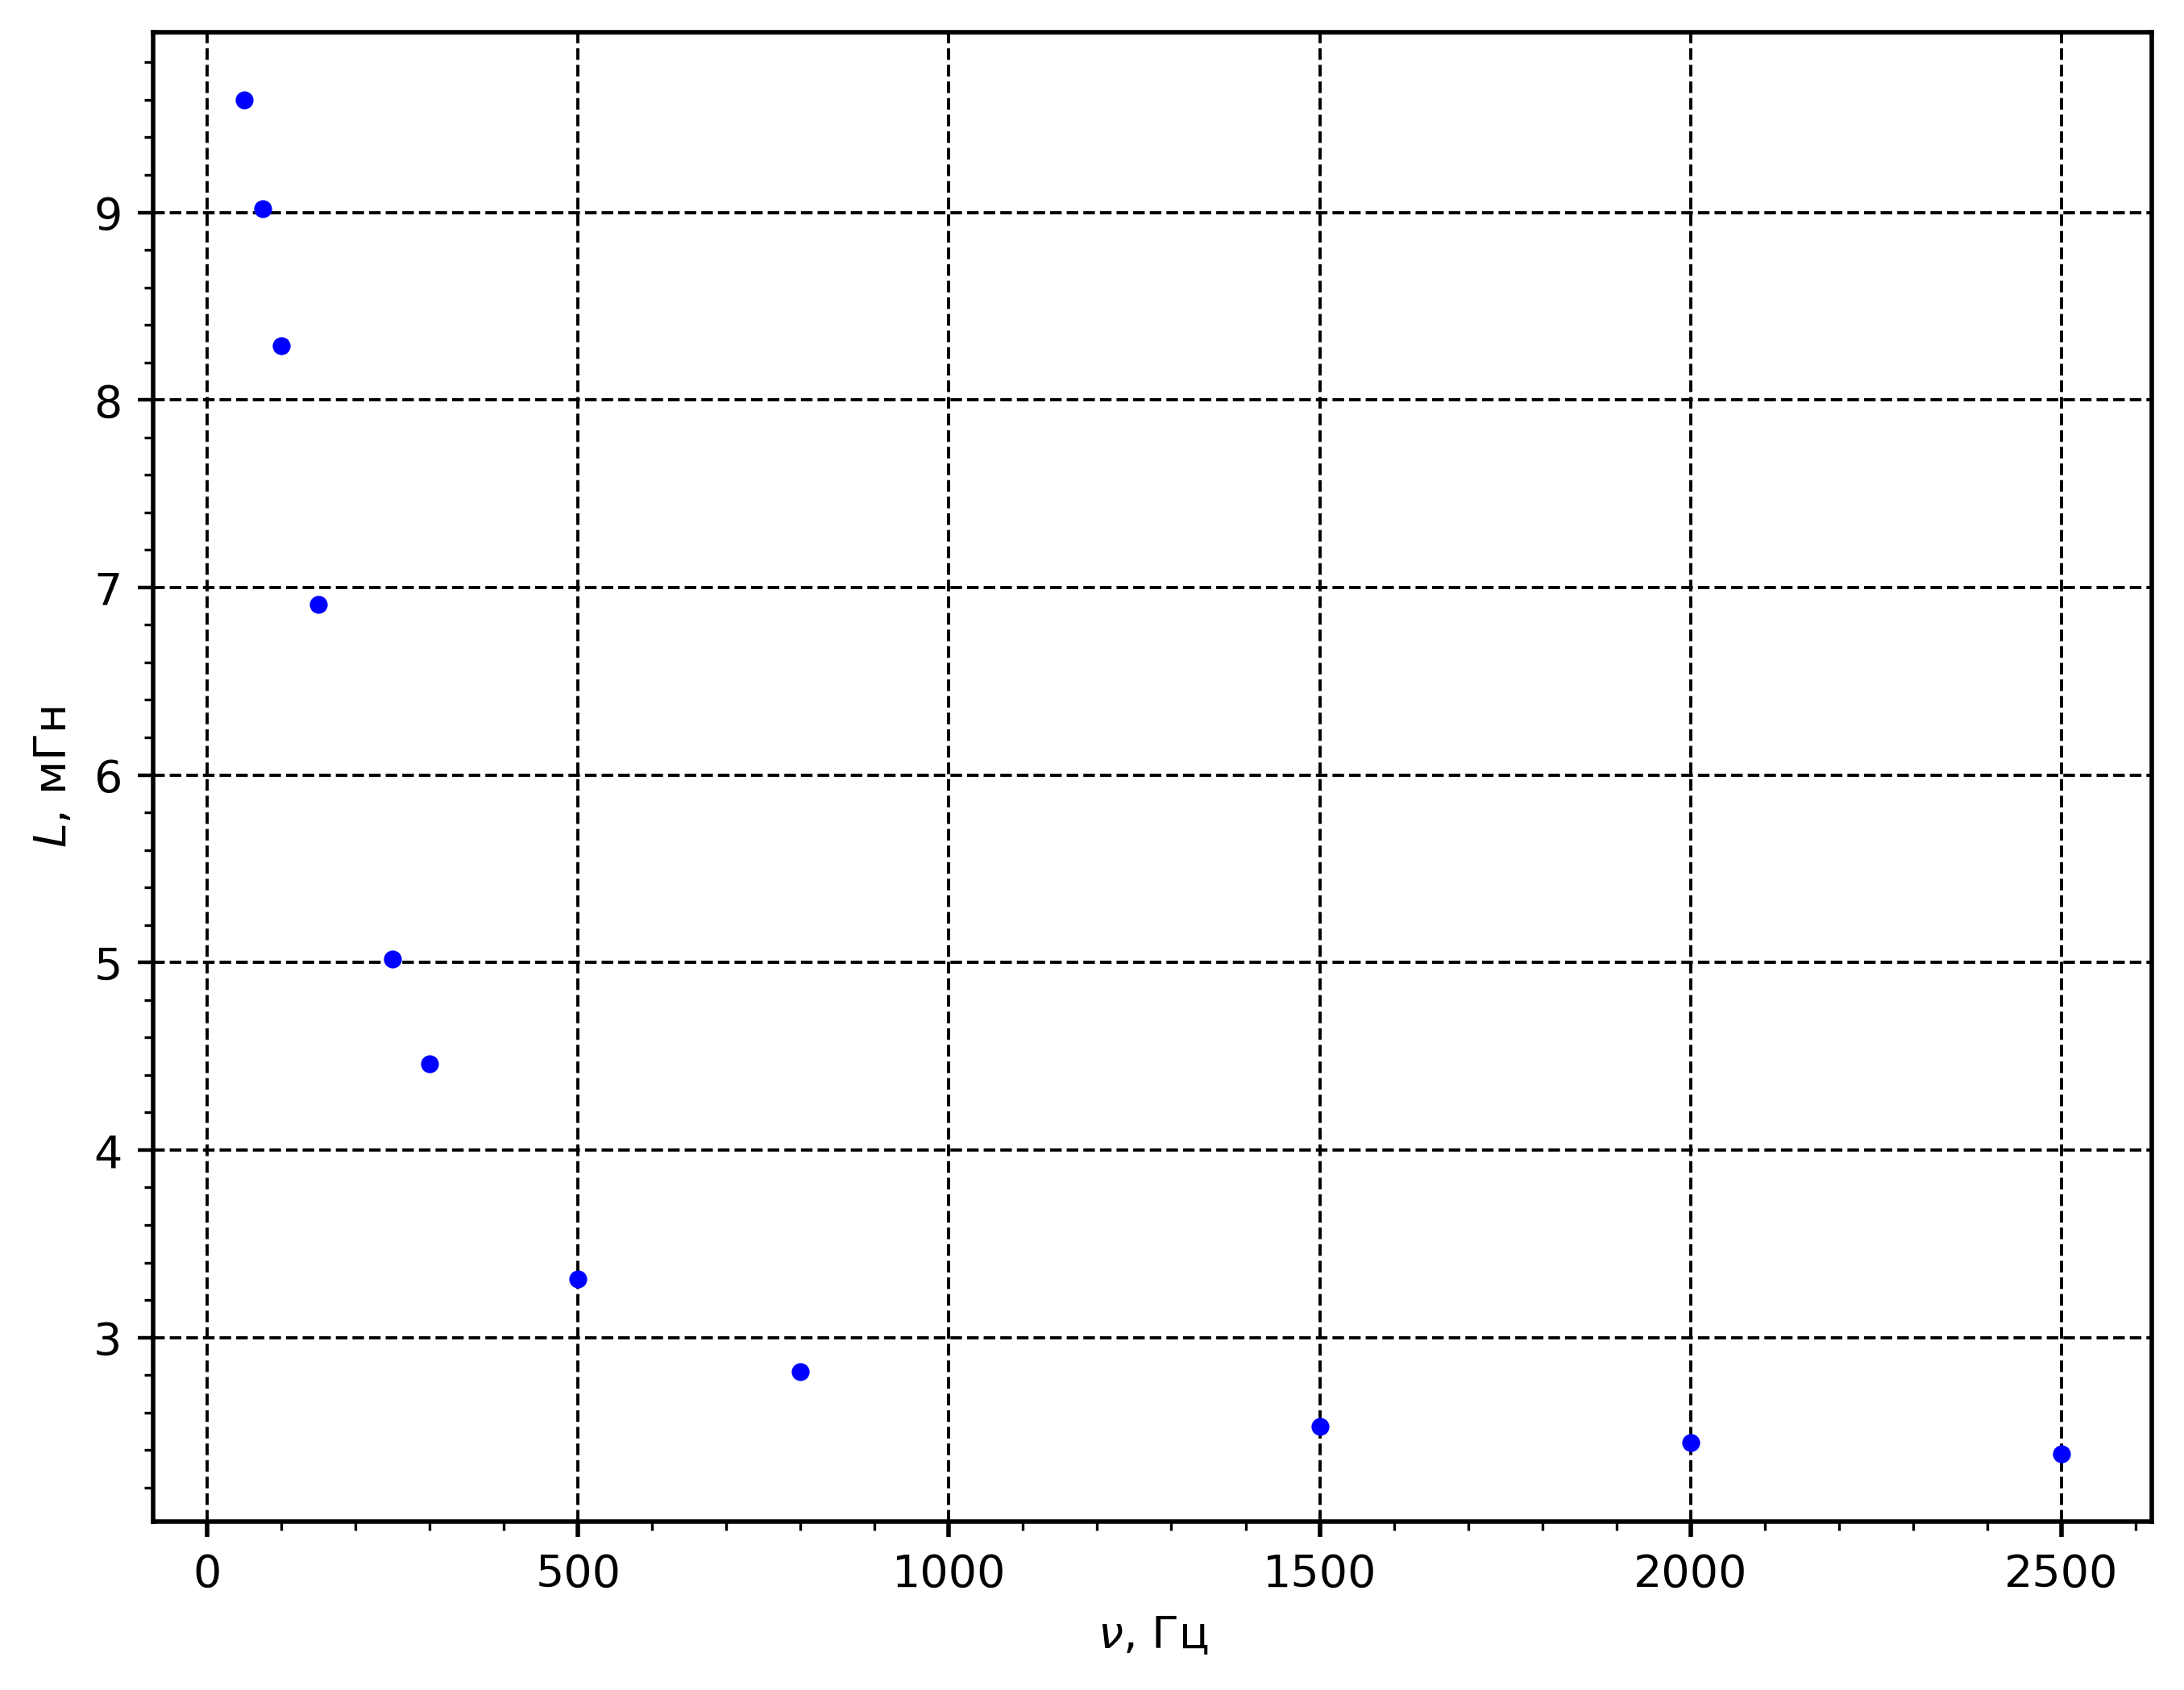

In [30]:
p10 = lab.plot.Plot(xl="$\\nu$", yl="$L$")
p10.plot(x, y, fmt=".")
p10.save("../img/plot10-1.png")

In [31]:
L_max = max(y)
L_min = min(y) * (1-1e-5)
L_max, L_min / (1-1e-5)

(9.6 <Unit('millihenry')>, 2.38 <Unit('millihenry')>)

In [32]:
utils.totex(L_max); utils.totex(L_min/ (1-1e-5))

9{,}6\;\text{мГн}
2{,}38\;\text{мГн}


In [33]:
x_ = arr.Array(x[:x.size-1])**2
y_ = arr.Array(1 / (arr.Array(y[:y.size-1])-L_min) * (L_max - L_min))

In [34]:
k, b = lf.lsq(x_, y_)
k, b

(2.817341782872966e-05+/-1.3918785350747607e-06 <Unit('1 / hertz ** 2')>,
 -0.11304964819004581+/-2.043135955244362 <Unit('dimensionless')>)

In [35]:
utils.totex(k)

\left(28{,}2 \pm 1{,}4\right)\cdot 10^{-6}\;\text{Гц}^{-2}


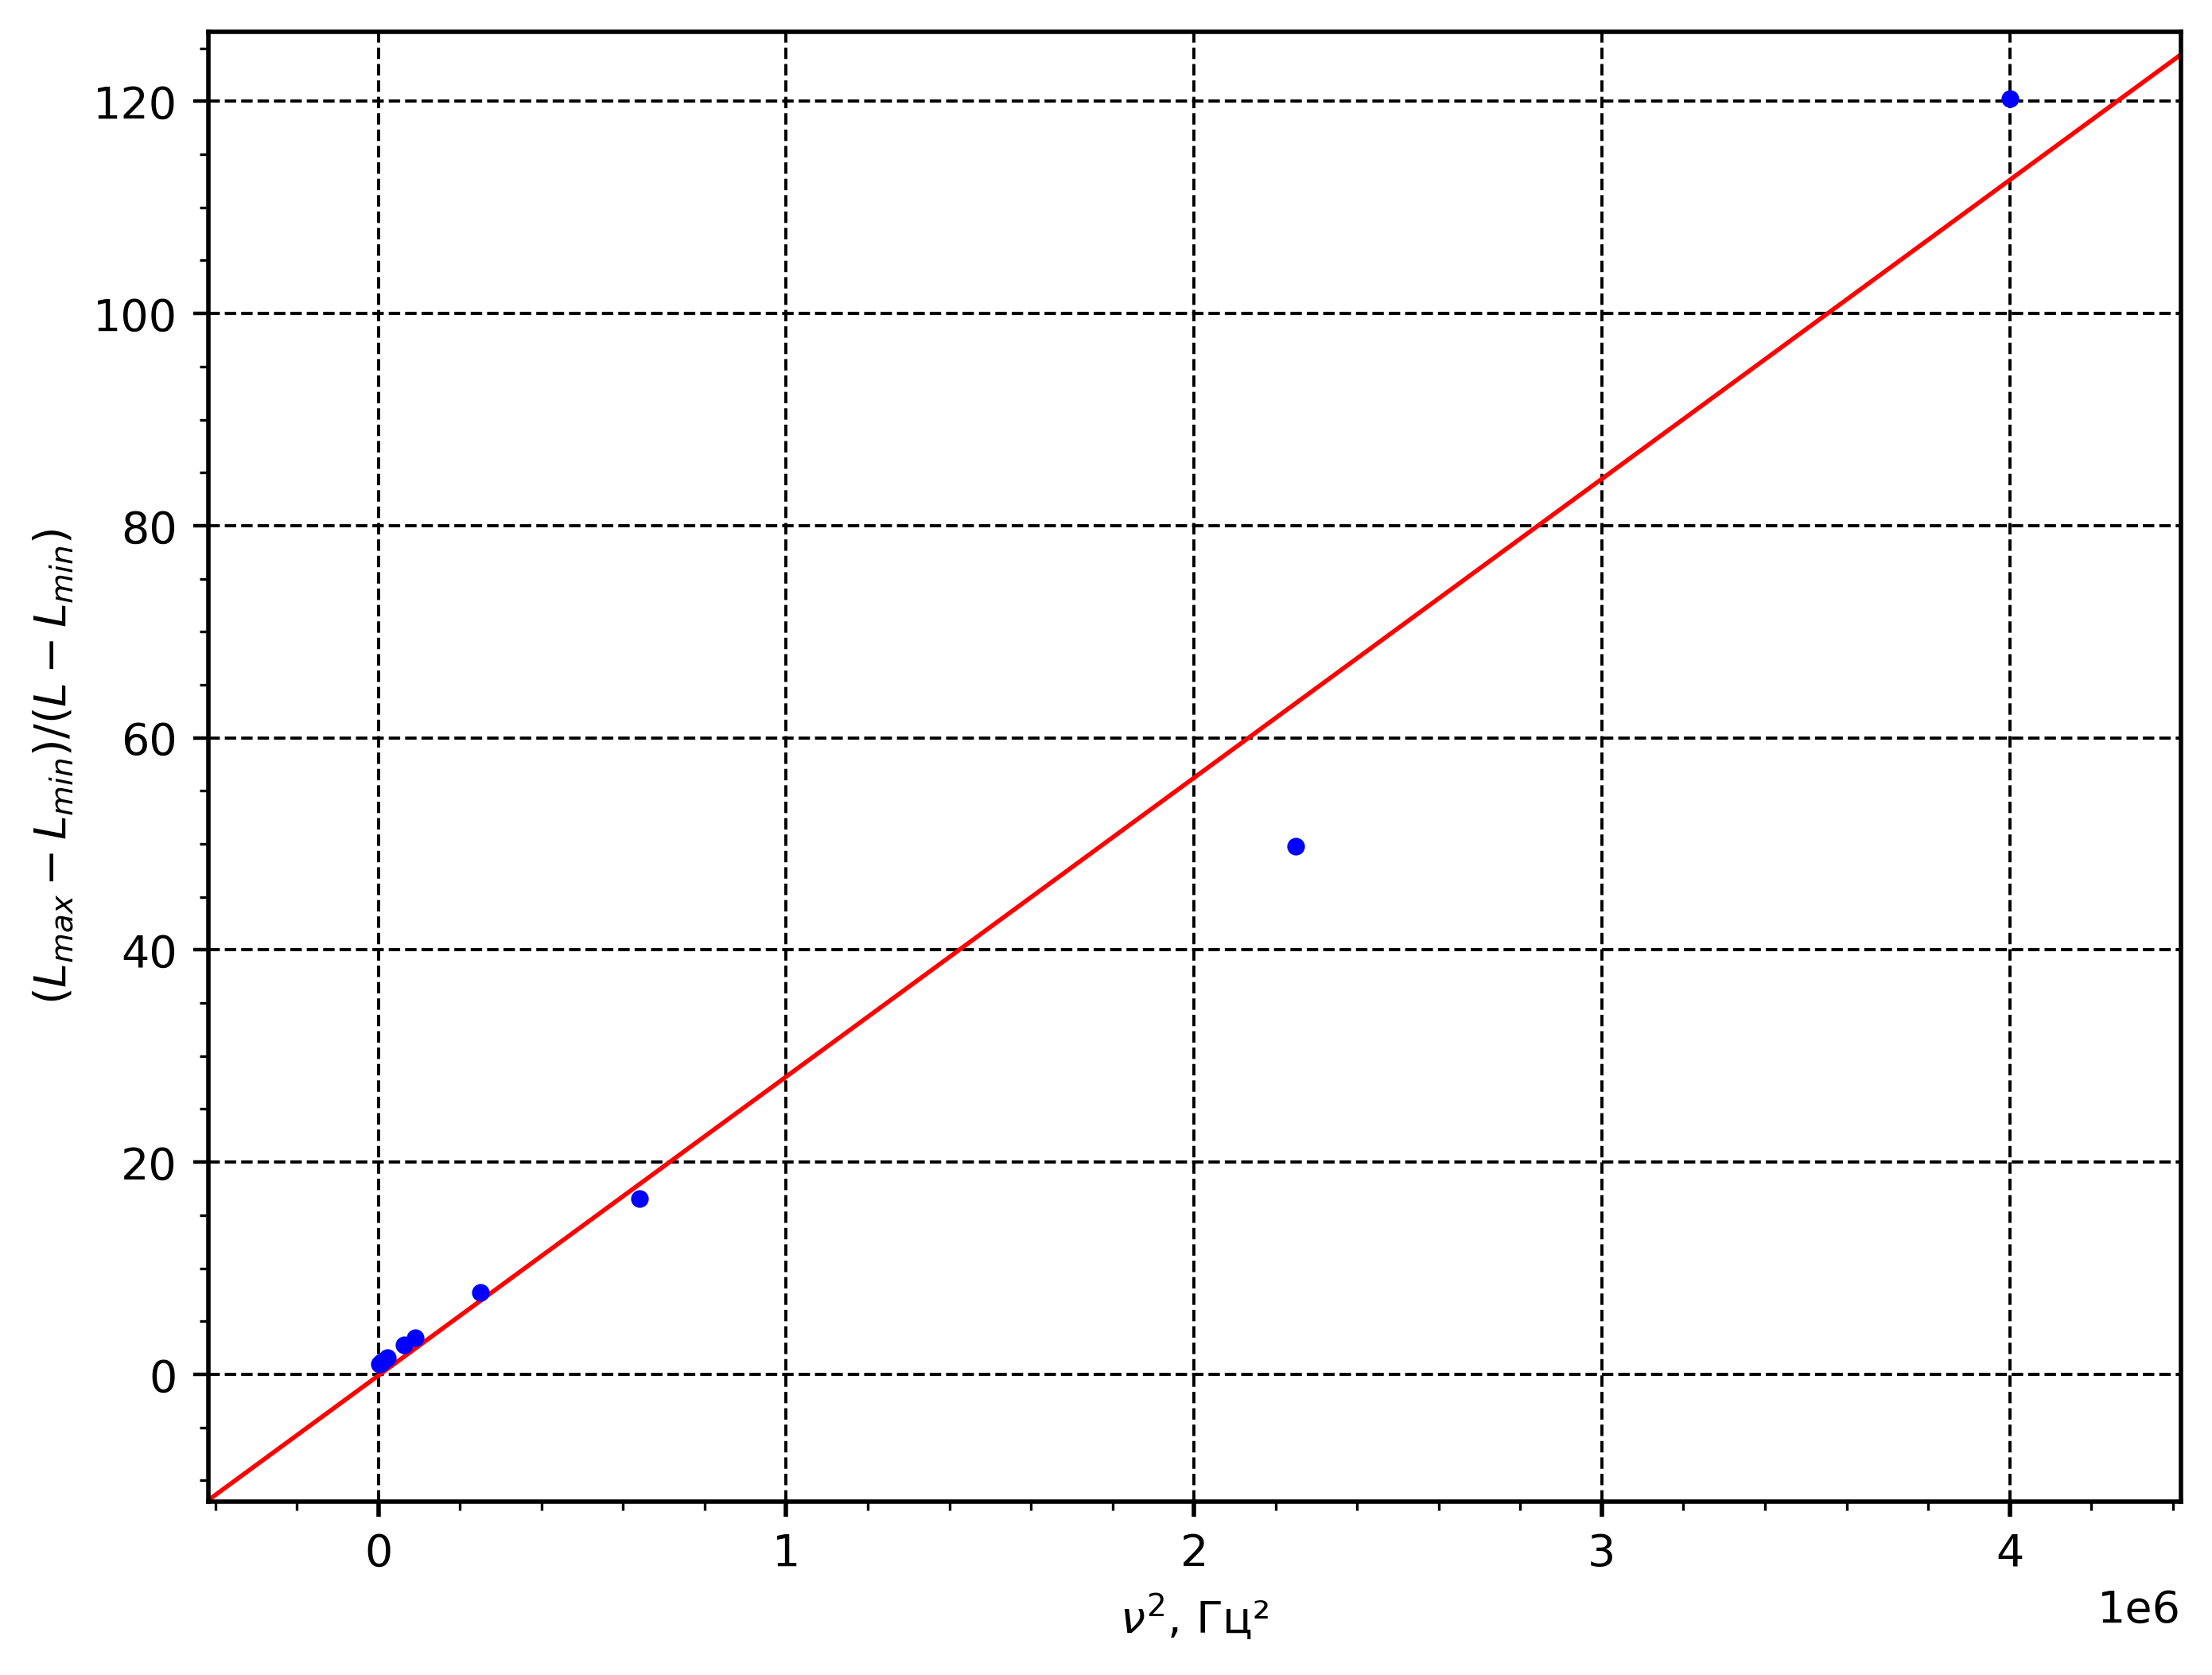

In [36]:
p10 = lab.plot.Plot(xl="$\\nu^2$", yl="$(L_{max} - L_{min})/(L-L_{min})$")
p10.plot(x_, y_, fmt=".")
p10.line(k, b, color="red")
p10.save("../img/plot10-2.png")

In [37]:
sigma = mmath._sqrt(k) / const.pi / a / h / const.mu0
sigma.ito("siemens/m")
utils.totex(sigma)

\left(39{,}8 \pm 1{,}0\right)\cdot 10^{6}\;\text{См} / \text{м}


In [165]:
y = arr.Array(concat(*low["H1/H2"].arr, *high["H1/H2"].arr))
x = arr.Array(concat(*low["f"].arr, *high["f"].arr))
x_ = np.log(np.linspace(4, 35000, 4000)) * u("")
a_ = a.m / 1000
h_ = h.m / 1000
def h1h0(x, sigma):
    x = np.exp(x.m); sigma = sigma; a = a_; h = h_
    alpha = np.sqrt(1j * 2 * np.pi * sigma * 4 * np.pi * 1e-7 * x)
    return np.real(1 / (np.cosh(alpha * h) + 0.5 * alpha * a * np.sinh(alpha * h)))

y1_ = arr.Array(list(h1h0(x_, 4.432e7) * u("dimensionless")))
y2_ = arr.Array(list(h1h0(x_, 3.98e7) * u("dimensionless")))
x_ = arr.Array(list(x_))

In [166]:
x_.arr = x_.arr[0]
y1_.arr = y1_.arr[0]
y2_.arr = y2_.arr[0]
x = mmath.log(x / u("Hz")).m * u("")

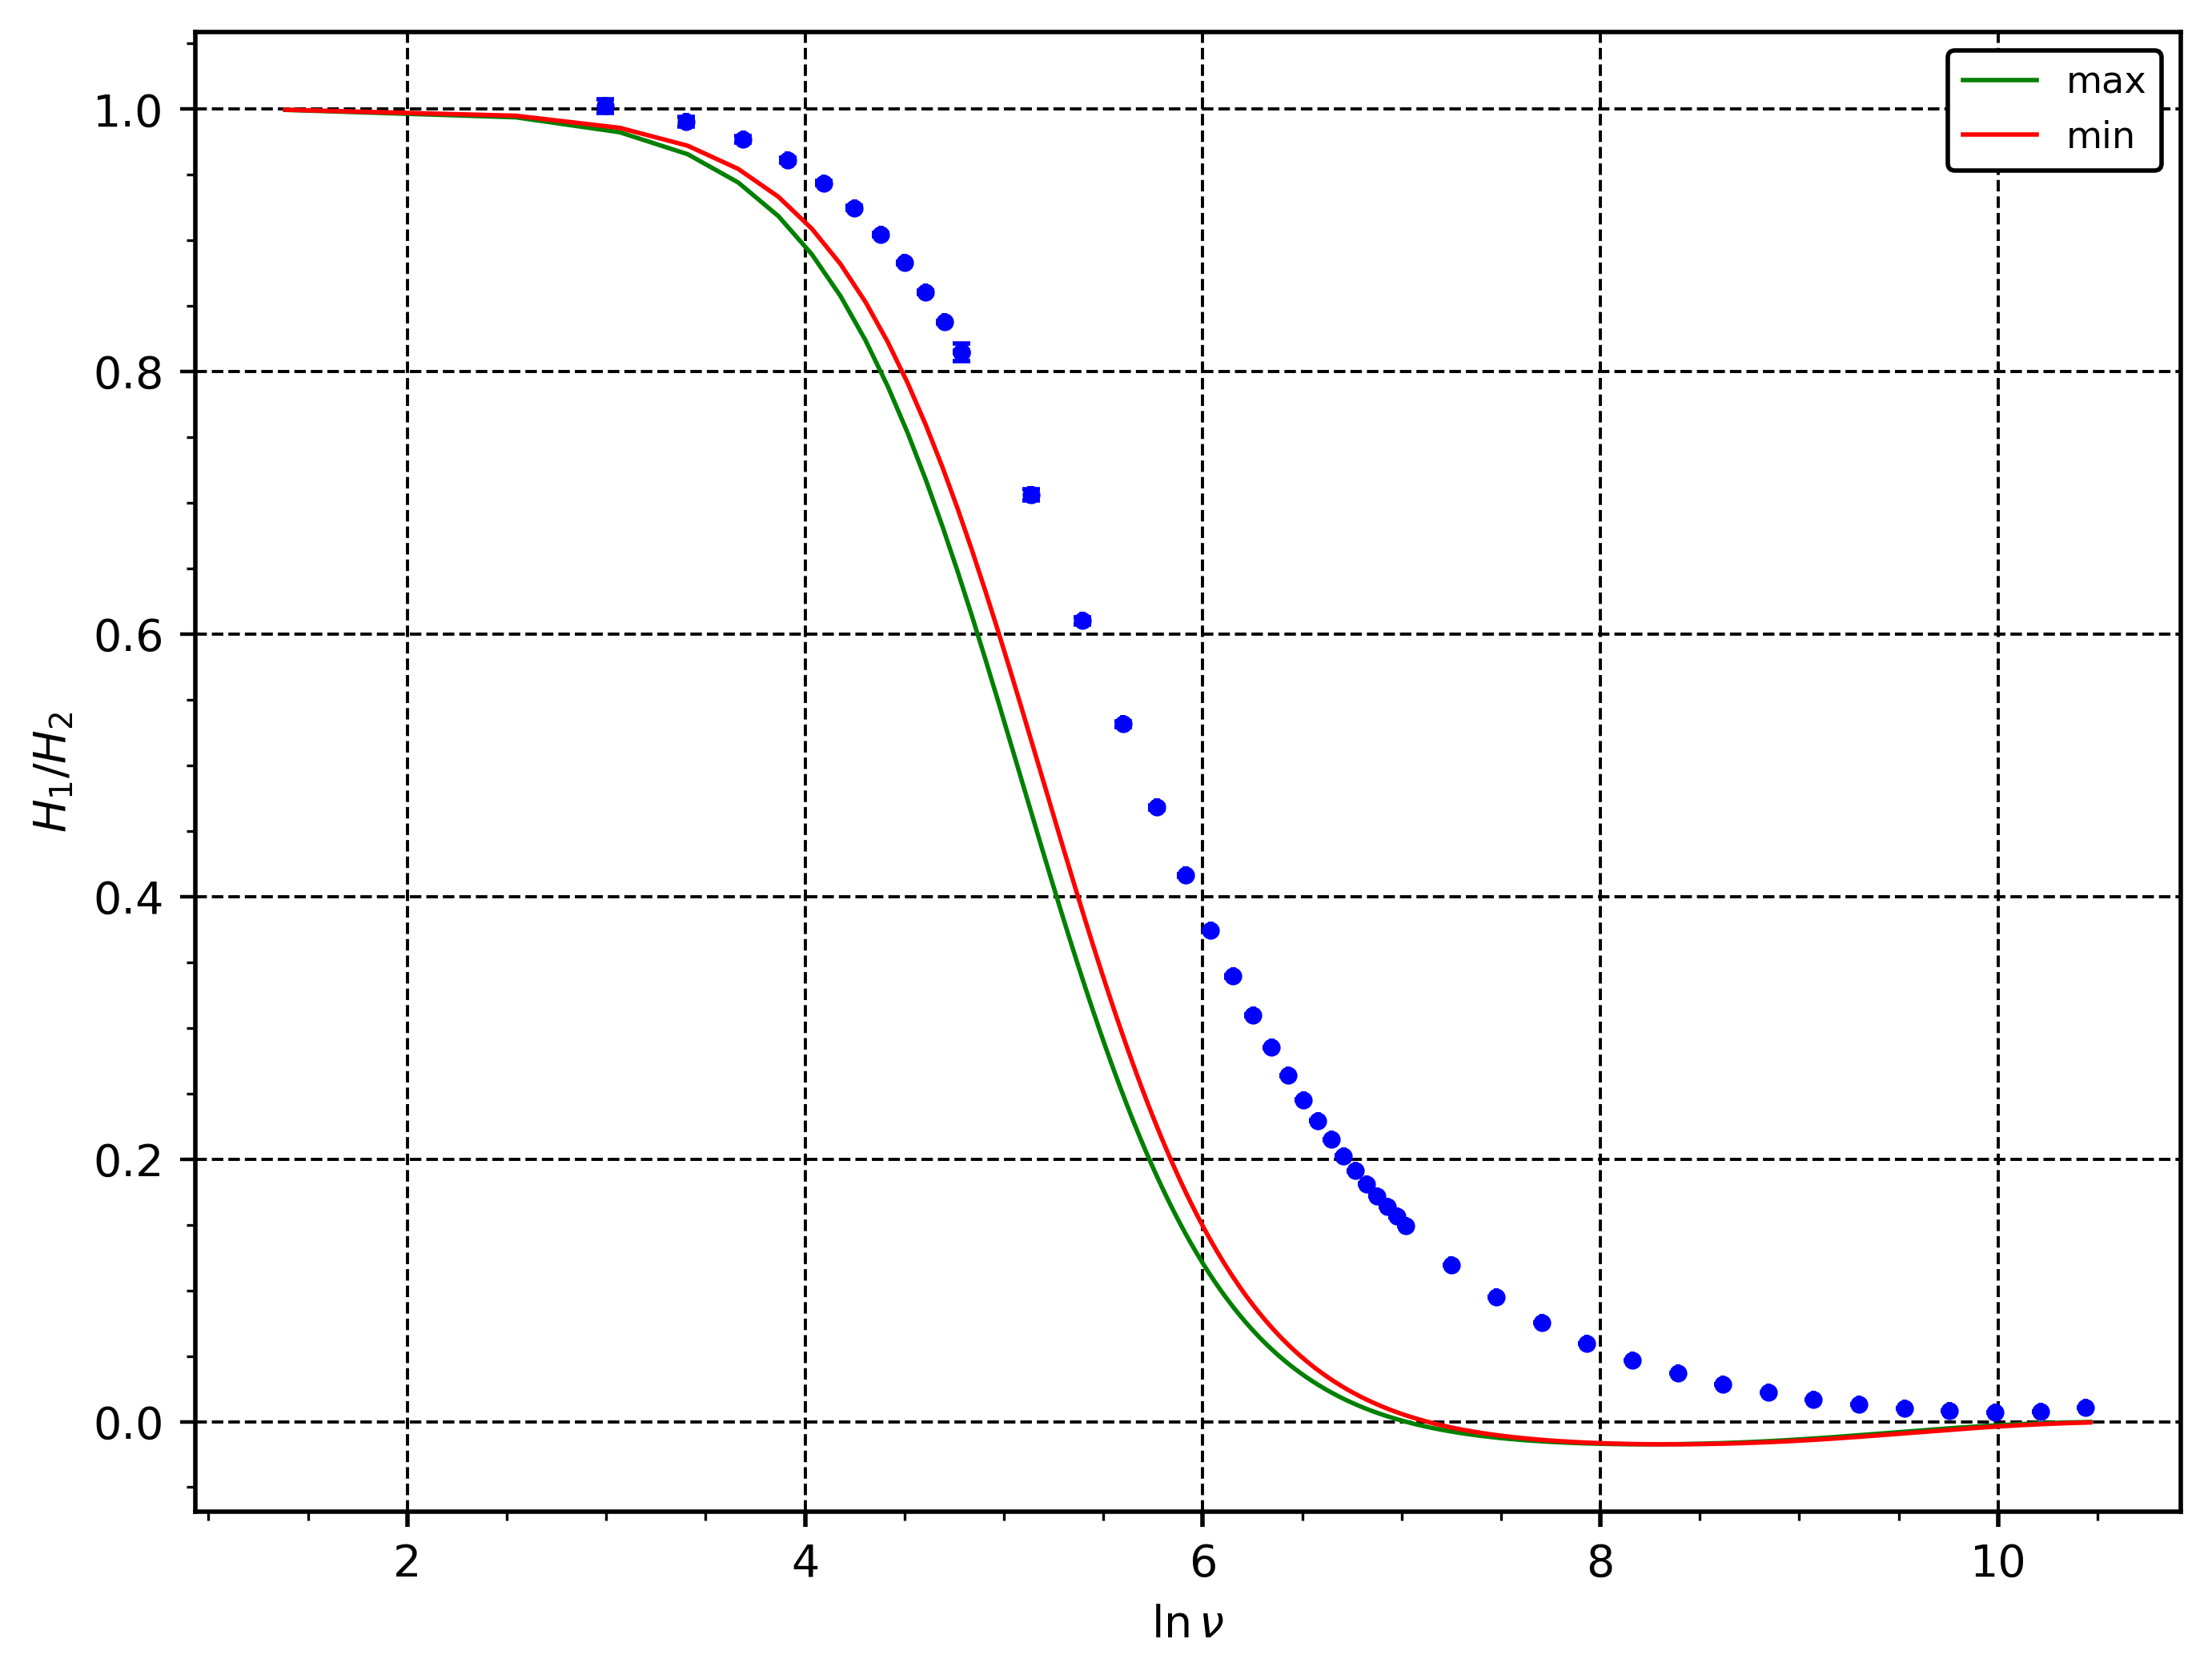

In [167]:
p = lab.plot.Plot(xl="$\\ln\\nu$", yl="$H_1/H_2$")
p.plot(x, y, fmt=".")
p.plot(x_, y1_, label="max")
p.plot(x_, y2_, label="min")
p.ax.legend()
p.save("../img/plot12.png")